#Подключитесь к своему диску, на котором расположена папка с фото

###Запустите выполнение программы (нажмте слева на [  ]). Дождитесь загрузки. Появтся ссылка. Нажмите на ссылку и подтвердите доступ к вашему диску. Появится набор символов и справа от него значок. Нажмите его (копирование символов в буфер обмена). Вернитесь к colab и в поле вставьте содержимое буфера обмена (Ctr+V) и нажмите Enter.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

##Загрузка библиотек

In [ ]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

In [3]:
from fastai.vision.all import *

###Полуение пути к папке

In [4]:
from pathlib import Path
str_path = '/content/gdrive/My Drive/111'
path = Path(str_path)

In [ ]:
path.ls()

In [ ]:
files = get_image_files("/content/gdrive/My Drive/111/")
len(files)

In [7]:
pat = r'^(.*)_\d+.jpg'

In [17]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224), bs=4)

###Вывод тестовых картинок с пометками ФИО

In [ ]:
dls.show_batch()

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224), bs=4)

In [ ]:
dls.show_batch()

###Обучение модели

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.fine_tune(5, 3e-3)

###Резьтат работы (сверху истинное значение, снизу предсказанное)

In [ ]:
learn.show_results()

###Посмотеть точность предсказания по кластерам

In [15]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

#Тест

In [42]:
img_tempRot = open_image('/content/gdrive/My Drive/111/test/a_1.jpg')
img_tempRot.show(y=learn.predict(img_tempRot)[0])

NameError: ignored

In [57]:
img = learn.predict('/content/gdrive/My Drive/111/test/a_1.jpg', with_input=True)

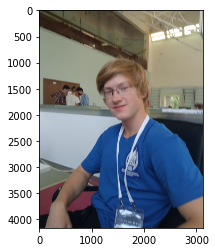

Image type: torch.FloatTensor
Image size: torch.Size([3, 4160, 3120])


In [56]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
%matplotlib inline

# pytorch provides a function to convert PIL images to tensors.
pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

# Read the image from file. Assuming it is in the same directory.
pil_image = Image.open('/content/gdrive/My Drive/111/test/a_1.jpg')
rgb_image = pil2tensor(pil_image)

# Plot the image here using matplotlib.
def plot_image(tensor):
    plt.figure()
    # imshow needs a numpy array with the channel dimension
    # as the the last dimension so we have to transpose things.
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

plot_image(rgb_image)

# Show the image tensor type and tensor size here.
print('Image type: ' + str(rgb_image.type()))
print('Image size: ' + str(rgb_image.size()))